In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

# from IPython.display import SVG, Image
# from livelossplot import PlotLossesKerasTF
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.1.0


In [2]:
# utils.datasets.fer.plot_example_images(plt).show()

In [3]:
for expression in os.listdir("train/"):
    print(str(len(os.listdir("train/" + expression))) + " " + expression + " images")

4097 fear images
436 disgust images
3171 surprise images
4965 neutral images
4830 sad images
7214 happy images
3995 angry images


In [4]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28708 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [7]:
%%time

epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
# callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]
callbacks = [checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 448 steps, validate for 112 steps
Epoch 1/15
447/448 [============================>.] - ETA: 0s - loss: 1.7774 - accuracy: 0.3153
Epoch 00001: saving model to model_weights.h5
448/448 [==============================] - 476s 1s/step - loss: 1.7773 - accuracy: 0.3153 - val_loss: 1.8488 - val_accuracy: 0.3269
Epoch 2/15
447/448 [============================>.] - ETA: 0s - loss: 1.4702 - accuracy: 0.4339
Epoch 00002: saving model to model_weights.h5
448/448 [==============================] - 459s 1s/step - loss: 1.4699 - accuracy: 0.4341 - val_loss: 1.4109 - val_accuracy: 0.4826
Epoch 3/15
447/448 [============================>.] - ETA: 0s - loss: 1.3364 - accuracy: 0.4866
Epoch 00003: saving model to model_weights.h5
448/448 [==============================] - 458s 1s/step - loss: 1.3366 - accuracy: 0.4865 - val_loss: 1.2335 - val_accuracy: 0.5290
Epoch 4/15
447/448 [============================>.] - ETA: 0s - loss: 1.2388 - accur

In [8]:

history2 = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=5,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 448 steps, validate for 112 steps
Epoch 1/5
447/448 [============================>.] - ETA: 0s - loss: 0.9979 - accuracy: 0.6244
Epoch 00001: saving model to model_weights.h5
448/448 [==============================] - 464s 1s/step - loss: 0.9977 - accuracy: 0.6245 - val_loss: 1.0179 - val_accuracy: 0.6210
Epoch 2/5
447/448 [============================>.] - ETA: 0s - loss: 0.9949 - accuracy: 0.6239
Epoch 00002: saving model to model_weights.h5
448/448 [==============================] - 467s 1s/step - loss: 0.9946 - accuracy: 0.6239 - val_loss: 1.0195 - val_accuracy: 0.6187
Epoch 3/5
447/448 [============================>.] - ETA: 0s - loss: 0.9873 - accuracy: 0.6269
Epoch 00003: saving model to model_weights.h5
448/448 [==============================] - 462s 1s/step - loss: 0.9876 - accuracy: 0.6269 - val_loss: 1.0128 - val_accuracy: 0.6200
Epoch 4/5
447/448 [============================>.] - ETA: 0s - loss: 0.9897 - accuracy:

In [9]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [12]:
hist = model.history

In [14]:
type(hist)

tensorflow.python.keras.callbacks.History

In [17]:
hist.history

{'loss': [0.9978095370037499,
  0.9946622824539038,
  0.9876460846851132,
  0.9896396360838817,
  0.989812497402799],
 'accuracy': [0.6244938, 0.6239003, 0.6268678, 0.6251222, 0.62386537],
 'val_loss': [1.0178840069898538,
  1.0195487761603934,
  1.0128184631466866,
  1.014721879735589,
  1.014251524183367],
 'val_accuracy': [0.6209542, 0.6187221, 0.61997765, 0.62248886, 0.6191406],
 'lr': [1e-05, 1e-05, 1e-05, 1e-05, 1e-05]}

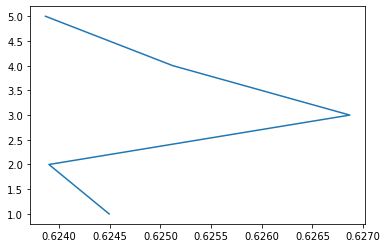

In [18]:
plt.plot(hist.history["accuracy"], )

In [19]:
np.arange(1, len(hist.history["accuracy"])+1)

array([1, 2, 3, 4, 5])

In [20]:
history.history

{'loss': [1.7773603655376042,
  1.46973608860572,
  1.3363527963987494,
  1.2380901628192487,
  1.1904163472463658,
  1.1135845670252602,
  1.08896188512226,
  1.080906589776007,
  1.063617032094635,
  1.0570658210968276,
  1.0407477983997582,
  1.03430794545882,
  1.0256170499359758,
  1.0166909639736474,
  0.9993176908403814],
 'accuracy': [0.3153191,
  0.43408743,
  0.4864544,
  0.5259391,
  0.5490853,
  0.5758972,
  0.58706886,
  0.5878369,
  0.59844995,
  0.6005097,
  0.6026044,
  0.60895824,
  0.61063397,
  0.61360145,
  0.62410975],
 'val_loss': [1.848794131406716,
  1.4109151001487459,
  1.2335128185472317,
  1.2505968143897397,
  1.4066318252256937,
  1.0847446351711238,
  1.078721757978201,
  1.0623112725360053,
  1.0517331609236342,
  1.0521486577178751,
  1.0423014789287532,
  1.0311523008027248,
  1.037330772860774,
  1.055788938222187,
  1.021256233299417],
 'val_accuracy': [0.32686943,
  0.48256138,
  0.52901787,
  0.5246931,
  0.44182476,
  0.59137833,
  0.5851005,
  0.